<a href="https://colab.research.google.com/github/everestso/Fall2021/blob/main/c165f21Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("TitanicTrain.csv")

print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   N

In [6]:
# check missing values in train data
print("Missing Values: ")
print(train_df.isnull().sum())

Missing Values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


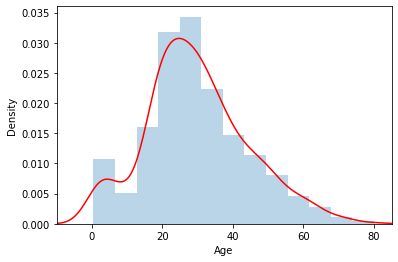

In [23]:
ax = train_df["Age"].hist(bins=13, density=True, alpha=0.3)
train_df["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

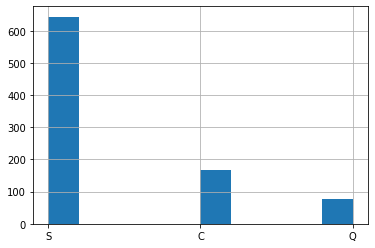

In [8]:
train_df['Embarked'].hist()
plt.show()

In [15]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

training=pd.get_dummies(train_data, columns=["Embarked"])
training.drop(columns=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(training.info())
print(training.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Embarked_C  891 non-null    uint8  
 2   Embarked_Q  891 non-null    uint8  
 3   Embarked_S  891 non-null    uint8  
dtypes: float64(1), uint8(3)
memory usage: 9.7 KB
None
    Age  Embarked_C  Embarked_Q  Embarked_S
0  22.0           0           0           1
1  38.0           1           0           0
2  26.0           0           0           1
3  35.0           0           0           1
4  35.0           0           0           1


In [ ]:
clf1 = LogisticRegression(solver='lbfgs',
                        max_iter=10000)
clf1.fit(training, train_df['Survived'] )

LogisticRegression(max_iter=10000)

# Mapping Values to 0/1

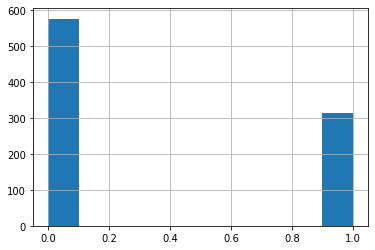

In [33]:
testing = train_data.copy()
testing['Sex'] = testing['Sex'].apply({'male':0, 'female':1}.get)
testing['Sex'].hist()

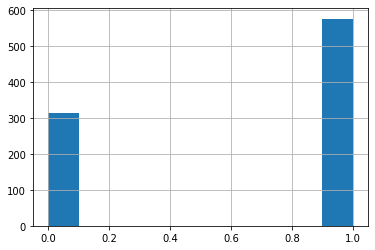

In [34]:
testing = train_data.copy()
testing['Sex']=testing['Sex'].map({'female':0,'male':1})
testing['Sex'].hist()

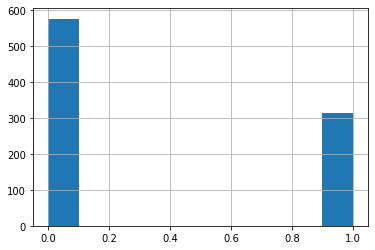

In [35]:
testing = train_data.copy()
testing['Sex'].replace(['male', 'female'], [0,1],inplace=True)
testing['Sex'].hist()

## Test Data

In [ ]:
TitanicTest = pd.read_csv('TitanicTest.csv')

In [ ]:
print("Missing Values: ")
print(TitanicTest.isnull().sum())

Missing Values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
test_data = TitanicTest.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
testing=pd.get_dummies(test_data, columns=["Embarked"])
testing.drop(columns=['PassengerId', 'Pclass', 'Name',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print(testing.info())
print(testing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   Embarked_C  418 non-null    uint8  
 2   Embarked_Q  418 non-null    uint8  
 3   Embarked_S  418 non-null    uint8  
 4   Sex_female  418 non-null    uint8  
 5   Sex_male    418 non-null    uint8  
dtypes: float64(1), uint8(5)
memory usage: 5.4 KB
None
    Age  Embarked_C  Embarked_Q  Embarked_S  Sex_female  Sex_male
0  34.5           0           1           0           0         1
1  47.0           0           0           1           1         0
2  62.0           0           1           0           0         1
3  27.0           0           0           1           0         1
4  22.0           0           0           1           1         0


In [ ]:
predict = clf1.predict(testing)

In [ ]:
TitanicTest['Survived']=predict

TitanicTest[['PassengerId','Survived']].to_csv('Titanic2.csv', index=False, header=True)